<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Janmejay, Vaishnavi

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [98]:
# User input for asset/company
asset_name = input("Enter the company name (e.g.TCS, Rakuten, Netflix): ").upper()
print(f"\nData analysis will be performed for: {asset_name}")


Enter the company name (e.g.TCS, Rakuten, Netflix): tcs

Data analysis will be performed for: TCS


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [99]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [100]:
def get_company_summary(company_name):
    try:
        # Search Wikipedia for the company
        search_results = wikipedia.search(company_name)

        if not search_results:
            return f"No Wikipedia pages found for {company_name}"

        # Keywords to detect company pages
        company_keywords = ["company", "corporation", "limited", "ltd", "group", "services", "bank", "motor", "industries", "technology"]
        global company_summary;
        # Try to find the best company-related page
        best_match = None
        for result in search_results:
            lower = result.lower()
            if any(keyword in lower for keyword in company_keywords):
                best_match = result
                break

        # If no match found, pick the first result
        if not best_match:
            best_match = search_results[0]

        # Fetch summary
        company_summary = wikipedia.summary(best_match, sentences=10)
        return company_summary

    except wikipedia.exceptions.DisambiguationError as e:
        # Pick first meaningful option
        option = e.options[0]
        company_summary = wikipedia.summary(option, sentences=10)
        return company_summary

    except Exception as e:
        return f"Error fetching summary: {e}"

# Usage:
print(get_company_summary(asset_name))


Tata Consultancy Services (TCS) is an Indian multinational technology company specializing in information technology services and consulting. Headquartered in Mumbai, it is a part of the Tata Group and operates in 150 locations across 46 countries. As of 2024, Tata Sons owned 71.74% of TCS, and close to 80% of Tata Sons' dividend income came from TCS.
TCS ranked seventh on the Fortune India 500 list for 2024. In September 2021, TCS recorded a market capitalization of US$200 billion, becoming the first Indian IT company to achieve this valuation. In 2012, it was the world's second-largest user of U.S. H-1B visas.


== History ==


=== 1968–2000 ===

Tata Consultancy Services Limited, originally known as Tata Computer Systems, was established in 1968 by Tata Sons Limited. The company's initial contracts involved providing punched card services to its sister company TISCO (now Tata Steel), developing an Inter-Branch Reconciliation System for the Central Bank of India, and offering bureau 

## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [101]:
tickers = {
    # Existing
    "NETFLIX": "NFLX",
    "APPLE": "AAPL",
    "TESLA": "TSLA",
    "GOOGLE": "GOOGL",
    "MICROSOFT": "MSFT",
    "TCS": "TCS.NS",
    "INFOSYS": "INFY.NS",
    "RAKUTEN": "RKUNY",
    "BITCOIN": "BTC-USD",

    # 🔥 Popular US Tech
    "AMAZON": "AMZN",
    "META": "META",         # Facebook
    "NVIDIA": "NVDA",
    "AMD": "AMD",
    "INTEL": "INTC",

    # 🏦 Finance
    "JP MORGAN": "JPM",
    "GOLDMAN SACHS": "GS",
    "MASTERCARD": "MA",
    "VISA": "V",

    # 🇮🇳 Common Indian Stocks
    "RELIANCE": "RELIANCE.NS",
    "HDFC": "HDFCBANK.NS",
    "ICICI": "ICICIBANK.NS",
    "WIPRO": "WIPRO.NS",
    "HCL": "HCLTECH.NS",
    "ADANIPORTS": "ADANIPORTS.NS",
    "ADANIENT": "ADANIENT.NS",

    # 🚗 Auto
    "TATA MOTORS": "TATAMOTORS.NS",
    "MARUTI": "MARUTI.NS",
    "TESLA": "TSLA",       # already above but kept for auto category

    # 🔴 Other Big Names
    "COCA COLA": "KO",
    "PEPSICO": "PEP",
    "WALMART": "WMT",
    "NETFLIX": "NFLX",     # already included

    # 💰 Other popular crypto
    "ETHEREUM": "ETH-USD",
    "DOGECOIN": "DOGE-USD",
    "SOLANA": "SOL-USD"
}

try:
    asset = tickers.get(asset_name.upper(), asset_name.upper())
    ticker = yf.Ticker(asset)
    market_data = ticker.history(period="1mo", interval="1d")

    if market_data.empty:
        raise ValueError("No data returned. Check ticker symbol.")

    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {asset}:")
    display(market_data.head())

except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")



 Market Data Sample for TCS.NS:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-10-13 00:00:00+05:30,3015.752355,3024.220771,2987.059321,2996.025879,2866865,0.0,0.0
1,2025-10-14 00:00:00+05:30,3009.774449,3015.951362,2944.517836,2949.300049,3611416,0.0,0.0
2,2025-10-15 00:00:00+05:30,2971.000000,2979.699951,2951.000000,2969.800049,4282226,11.0,0.0
3,2025-10-16 00:00:00+05:30,2969.899902,2975.000000,2943.100098,2970.699951,3251495,0.0,0.0
4,2025-10-17 00:00:00+05:30,2970.000000,2988.800049,2955.399902,2962.199951,4374683,0.0,0.0


In [102]:


from IPython.display import display, HTML
import feedparser

# Construct RSS feed URL for Google News
news_url = f"https://news.google.com/rss/search?q={asset_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(news_url)

print(f"\n Recent News Headlines for {asset_name}:")

# Iterate through the first 10 news items (or fewer if less than 10)
for entry in feed.entries[:10]:
    display(HTML(f'{entry.title}'))
    # Display summary and source if available
    news_summary = getattr(entry, 'summary', 'N/A')
    source = getattr(entry, 'source', 'N/A')
    print(f"Summary: {news_summary}\nSource: {source.get('title', 'N/A')}\n")


 Recent News Headlines for TCS:


Summary: <a href="https://news.google.com/rss/articles/CBMiggFBVV95cUxQQnRCOU43M29zWk9pdDNIUFpnSEtSVTcyRmlrWHJIQ1dnZV9hekVLSnIyZFlzVy1SbHJpQkh1TUt0VXhfdUtNS3ljZDNzRHhha1VJOFhVZGxsWUNpWURsVkFROS1lblp3TEEtcE05XzQxejkzVG1vNGg3QlZ3QWZRbzF3?oc=5" target="_blank">Institutions own 28% of Tecsys Inc. (TSE:TCS) shares but retail investors control 53% of the company</a>&nbsp;&nbsp;<font color="#6f6f6f">Yahoo Finance</font>
Source: Yahoo Finance



Summary: <a href="https://news.google.com/rss/articles/CBMi1wFBVV95cUxPY1dBLXdSWVBKM04zU0ZjVS10Y2tuc2MxOFN4QmhUcV9FWHRKVWRXYWItZWZVTmoxamJPbjZ4N2MtVUppa2xXOXVVcEVSMGFZSVM4UG9lUlEwcThfUzZyd19NbnFyUzlHU0VzS3RDY3F2T25qY1h4TV9SeGJCYzRsb0E5UGdjY3oyNTlYYzNnVG41bDg5NGtRd2Ntc2p2YzRacG96RXJYdUVwWDR0eGNTTUhCdmpOblUzNkdDRkwyWndnM3JqT2ZIOFJfRnlmUHczTWsyYUtiRQ?oc=5" target="_blank">TCS and SINTEF Forge Partnership to Deploy Artificial Intelligence for Improving Elderly Care</a>&nbsp;&nbsp;<font color="#6f6f6f">Tata Consultancy Services</font>
Source: Tata Consultancy Services



Summary: <a href="https://news.google.com/rss/articles/CBMilAFBVV95cUxNWkx0cFlNVFlmeTZ0SmxjWF8tRGtSd096RnVJVzByVFozUFRyNGdVa1E3S2s3eVZxVE5qa1BWRUItUmZleFN6SmxEWEpQOC00YzFlaWRPV2xkRVhvdkM2MjR1Ri1BVE14QVNPUjd4N1BGNzFiT1VySTRoR29TTDVISHI1NTltbWRueVNCdnhNLXlweVdS?oc=5" target="_blank">Charities at the 2025 TCS New York City Marathon</a>&nbsp;&nbsp;<font color="#6f6f6f">New York Road Runners</font>
Source: New York Road Runners



Summary: <a href="https://news.google.com/rss/articles/CBMikAFBVV95cUxOY2NrREJEdUFrOTFPQUJIdGV3aW1WdFhybmUwMmhaX3pBM1RQeGF6X2RIcWlZVlRYbDhLZmZ2NFRZLTcxV1VsaDJwTFNjeTBQLWhXellSVDJidlBna3YzQXZmMVlRbHZaOWlKejNaMU5ydnJSMGEtS3NYSDBVb2JNdmkzWk9GeXBBUjc4Zk1iMmTSAZYBQVVfeXFMTnBFR0k4ZkRPcEozZm4yQmdEdWJvV0lzSGRMaWN4elNuMVhHWkZIaGV2aDlyenE0ck9xckNFMlBvWlgwaEpUVFg0OTZ1d3hZbkJVSlU2QTNtMFVXWnkwZFdIZDFZMVRhbzBUSVNfNlJwVnVXejkzZmZDbnpDOXVoMTJKblhTMUJROXFFQnNxRXdfem1LSUZ3?oc=5" target="_blank">Morrisons taps TCS for digital operations upgrade</a>&nbsp;&nbsp;<font color="#6f6f6f">Consultancy.uk</font>
Source: Consultancy.uk



Summary: <a href="https://news.google.com/rss/articles/CBMiqwFBVV95cUxPbE1LdkVlXzdSWkQzRVN3aVktY2VIdlFEUHU2cGlpM0tzUnNQYnRIRlkxZDlHdXA3by1zWHpEVDdlZkt3VGZnck9KQXhmcUs5Q210UHpibnlfWlBUV3FtTmxMbGtBbUhsenVPak1MQ3VJNlNPc2Fwc0s5elYtZmR4aXBKMDByZVZZN0FSYW1ESE12Ung5bzJnR1JkX1A3WjltY0tKaUFpMFRWaXPSAbABQVVfeXFMTl9hRElUZnZtZkhzd2N4M3Raa01nRkJxMm9tempQbmpaZjN5NjMyOWl0dVZMRmx2VFJoMko0ajdYYTB2YXhTbW9vT0o4ek54Zmh6MVZlWUdkNHB5M2lDM2RxaGw5dXJadDFEU1RwVF9uQndnYVZlblAyRHBYa2dHRzRGWDlOZU5rZ2pHSlJPQnVaamJTR0NncjdyMUpCMkVDSWp5RTdPX1FhRWF1MVBBQ1g?oc=5" target="_blank">Last runner to finish 2025 TCS NYC Marathon shares harrowing journey to triumph</a>&nbsp;&nbsp;<font color="#6f6f6f">ABC7 New York</font>
Source: ABC7 New York



Summary: <a href="https://news.google.com/rss/articles/CBMiwgFBVV95cUxPMjB2MTRRUlU3UVBfdG14YWwxYXg5T3Q0bG9FQ21SaVN4U05uMlBnaTlKUG1sQ1p1SzZzZmNhSjNlMlVMRTBKTzZKamhUTnN6RkRvTXV3TEpfUFc4V2VvUnR6Ny1HdHhCc0s0TTJxNEdoZVp5YlpKRFF2VnFxc05lbE1uTG5obEo1QXUtZzJrNUNHRV83NTJ6YUU4c2lGbnljRzdtaHdBMUhuX3JZT3ZUbWRCRS0xZkljSFJMXzRjblRMUQ?oc=5" target="_blank">AI to care for your grandparents? TCS partners with SINTEF for elderly revolution</a>&nbsp;&nbsp;<font color="#6f6f6f">Indiablooms</font>
Source: Indiablooms



Summary: <a href="https://news.google.com/rss/articles/CBMiqAFBVV95cUxOMzlCTnpJY3ZuYTU2SW8teWZTNVlrQ3Jpd0R3aUhESk9UcF8tLUU5S3ZiM05uYWE5Qm9PX3BTdjhrZWxfTnJsbHZQdjdXMlJpejBpYXFwU2tRRGJ1Y3YyMDZPYnV0bGpJU3lsNGg2U2txc3I2RElmcWFjemhzMGo4ZmV2dktfWEpCbS04YjBTdTl6NjVpdUNJVm9adDhzVVpFSE1mT0w5Z18?oc=5" target="_blank">TCS and Sintef partner to deploy AI for elderly care</a>&nbsp;&nbsp;<font color="#6f6f6f">MarketScreener</font>
Source: MarketScreener



Summary: <a href="https://news.google.com/rss/articles/CBMiygFBVV95cUxPam5wcmpETVhiN2pKQ2VTcVRGZHdSNGkxTXhvZ2ZyenE0My1VdzdrRkY0ZXpJa3RmbEF3djJ5S1JBOVJFLURZY29PQ2VmVVlwOXlTOWVtSlBCVFQ5NVZOclFXMmJmbFVzWVFtY3VPMF9PMmRLZEtzanhld3Z4d1hpMDRYb19fblBqVlNuWGRnZ0RPbHo1ck5jTWozVnhwZUswSnl5S1RqTVpqWUt3SVM4d25vMXl6NDY4dkNtZ3pURE5MVVpFVEUxVTlB?oc=5" target="_blank">Tuscaloosa City Schools prepare to support families amid SNAP benefit suspension</a>&nbsp;&nbsp;<font color="#6f6f6f">The Tuscaloosa News</font>
Source: The Tuscaloosa News



Summary: <a href="https://news.google.com/rss/articles/CBMi5wFBVV95cUxPTVUyZHRqT0ZCZ3ZqLTFNUFpFdXh0U0FXZE80MURYWXc2SmNMR2hLWTFGRXJYZ01tbGNNWEF4MjVIQmtTcElXdUpwVXo3RGQ2cVBLVGVjZFAwQ3NaaVFnV0dDUVZUN0lIbXZ5aHdFd0FaWl90YzBiUFZudkVxeTkwN1RGUzhPbGNpZk03bjRFQWhTYzY5Y0U4Xzh6UVVKaWRMdmo5akRsX0tVcjJrSVkybVFVM2VTbVduTVlRWEVsaUdBNnFxQXhwY2M0WThrNzl1enlsSFVyZExHZVNMbVI1aTZnOGQ3ck0?oc=5" target="_blank">Thematic Report on The Great IT Bifurcation: Why TCS Is Downsizing While Coforge Soars</a>&nbsp;&nbsp;<font color="#6f6f6f">Smartkarma</font>
Source: Smartkarma



Summary: <a href="https://news.google.com/rss/articles/CBMiswFBVV95cUxPeHREZFNhOEg2Z0FsM1Y3ZE95LVlKYkV6ZnpETVJJQ0xrWEJrdzhEYXdIZFVac01ha0sxbVVSYTdGY1ZCd2dyMGdaSU90X2F0ZHFuWGhBSXhVNW0ybFpKei0walBub2JNYUhnX05xM3FYOGNTN2JxamtMenRxOU1FNm84UnVhNV84SjRRVW1sb1lrRVFyMElJS2Y5eXc4WnByTzhIUDhrNVRjRjBuWkVBalZnWQ?oc=5" target="_blank">TCS Named a Leader in Digital Workplace Services by Everest Group</a>&nbsp;&nbsp;<font color="#6f6f6f">Tata Consultancy Services</font>
Source: Tata Consultancy Services



## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [103]:
# Construct RSS feed URL for Google News
company_name=asset_name.replace(" ", "");
rss_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
titles = [item["Title"] for item in news_items]
links = [item["Link"] for item in news_items]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {asset_name}:")
display(news_df)


 Top 10 News Headlines for TCS:


,Title,Link,Published
0,Institutions own 28% of Tecsys Inc. (TSE:TCS) ...,https://news.google.com/rss/articles/CBMiggFBV...,"Tue, 11 Nov 2025 10:07:15 GMT"
1,TCS and SINTEF Forge Partnership to Deploy Art...,https://news.google.com/rss/articles/CBMi1wFBV...,"Tue, 11 Nov 2025 09:59:40 GMT"
2,Charities at the 2025 TCS New York City Marath...,https://news.google.com/rss/articles/CBMilAFBV...,"Wed, 05 Nov 2025 22:03:54 GMT"
3,Morrisons taps TCS for digital operations upgr...,https://news.google.com/rss/articles/CBMikAFBV...,"Tue, 11 Nov 2025 04:52:30 GMT"
4,Last runner to finish 2025 TCS NYC Marathon sh...,https://news.google.com/rss/articles/CBMiqwFBV...,"Fri, 07 Nov 2025 03:04:02 GMT"
5,AI to care for your grandparents? TCS partners...,https://news.google.com/rss/articles/CBMiwgFBV...,"Tue, 11 Nov 2025 10:36:37 GMT"
6,TCS and Sintef partner to deploy AI for elderl...,https://news.google.com/rss/articles/CBMiqAFBV...,"Tue, 11 Nov 2025 09:58:06 GMT"
7,Tuscaloosa City Schools prepare to support fam...,https://news.google.com/rss/articles/CBMiygFBV...,"Sun, 09 Nov 2025 10:14:16 GMT"
8,Thematic Report on The Great IT Bifurcation: W...,https://news.google.com/rss/articles/CBMi5wFBV...,"Tue, 11 Nov 2025 01:35:37 GMT"
9,TCS Named a Leader in Digital Workplace Servic...,https://news.google.com/rss/articles/CBMiswFBV...,"Tue, 11 Nov 2025 09:59:40 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [104]:
fake = Faker()
positive_phrases = [
    f"{company_name} is surging!",
    f"Profits from {company_name} are amazing!",
    f"Holding {company_name} long-term, confident.",
    f"{company_name} adoption is growing worldwide!",
    f"Investors are optimistic about {company_name}."
]

negative_phrases = [
    f"Worried about {company_name} volatility.",
    f"{company_name} might crash soon.",
    f"{company_name}'s future is uncertain.",
    f"High risks in {company_name} investments.",
    f"{company_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{company_name} price remains stable today.",
    f"Market watching {company_name} closely.",
    f"{company_name} updates coming soon.",
    f"{company_name} performance unchanged.",
    f"Analysts report on {company_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,Profits from TCS are amazing!
1,Profits from TCS are amazing!
2,TCS is surging!
3,Profits from TCS are amazing!
4,TCS's future is uncertain.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [105]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,Profits from TCS are amazing!,0.75,Positive
1,Profits from TCS are amazing!,0.75,Positive
2,TCS is surging!,0.00,Neutral
3,Profits from TCS are amazing!,0.75,Positive
4,TCS's future is uncertain.,0.00,Neutral


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

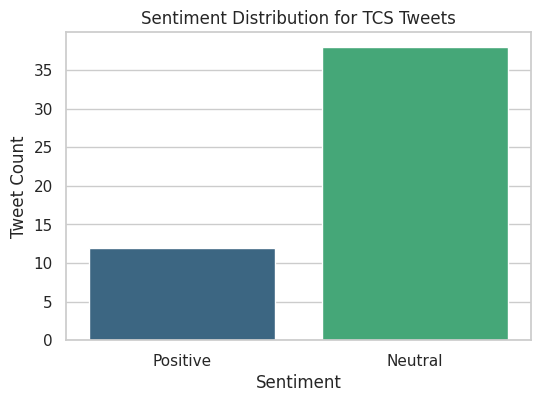

In [106]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {company_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


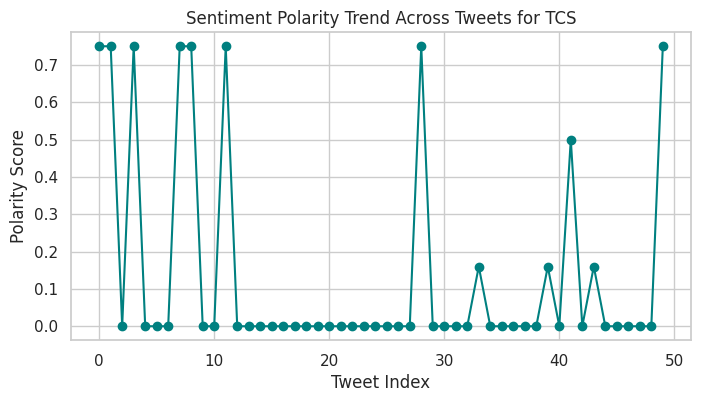

In [107]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {company_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


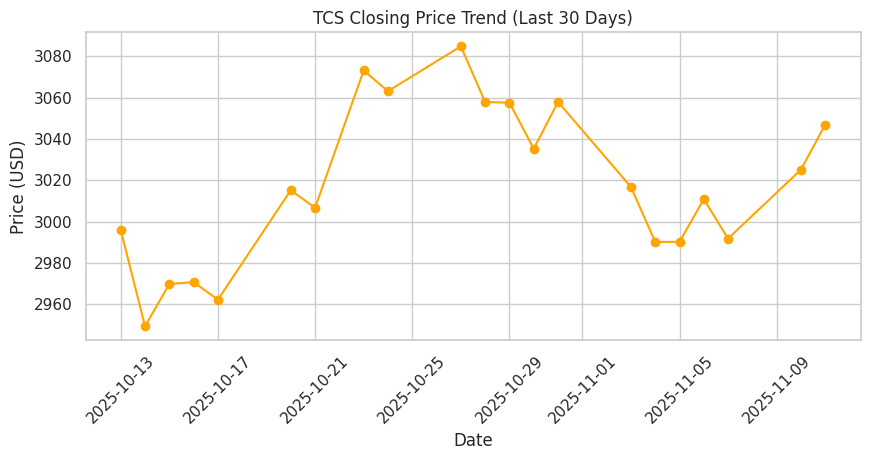

In [108]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{company_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using Alpha Vantage for Stock Data


First, install the library:

In [109]:
!pip install alpha_vantage

### Analyze Alpha Vantage Data
Here are some descriptive statistics for the Alpha Vantage data:

In [110]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
from google.colab import userdata

API_KEY = userdata.get('ALPHA_VANTAGE_API')
def detect_symbol(asset_name: str) -> str:
    """
    Maps common company/asset names to their typical stock or crypto symbols.
    If no match is found, the name itself is returned as the potential symbol.
    """
    mapping = {
    "BITCOIN": "BTCUSD",
    "BTC": "BTCUSD",

    "TESLA": "TSLA",
    "TSLA": "TSLA",

    "NETFLIX": "NFLX",
    "NFLX": "NFLX",

    "INFOSYS": "INFY",
    "INFY": "INFY",

    "TCS": "TCS",
    "TATA CONSULTANCY": "TCS",

    "RAKUTEN": "RKUNY",

    # ✅ Common U.S. tech
    "APPLE": "AAPL",
    "AAPL": "AAPL",

    "GOOGLE": "GOOG",
    "ALPHABET": "GOOG",
    "GOOG": "GOOG",

    "MICROSOFT": "MSFT",
    "MSFT": "MSFT",

    "AMAZON": "AMZN",
    "AMZN": "AMZN",

    "NVIDIA": "NVDA",
    "NVDA": "NVDA",

    "META": "META",
    "FACEBOOK": "META",

    # ✅ More popular tickers
    "AMD": "AMD",
    "INTEL": "INTC",
    "COCA COLA": "KO",
    "PEPSICO": "PEP",
    "WALMART": "WMT",

    # ✅ Indian stocks (BSE/NSE)
    "RELIANCE": "RELIANCE.BSE",
    "HDFC": "HDFC.BSE",
    "ICICI": "ICICIBANK.BSE",
    "WIPRO": "WIPRO.BSE",
    "HCL": "HCLTECH.BSE",

    # ✅ Crypto
    "ETHEREUM": "ETHUSD",
    "ETH": "ETHUSD",
    "DOGE": "DOGEUSD",
    "DOGECOIN": "DOGEUSD",
    "SOLANA": "SOLUSD",
    "SOL": "SOLUSD",
}

    # Return the mapped symbol or the original name (converted to uppercase for robustness)
    return mapping.get(asset_name.upper(), asset_name.upper())

    # --- Core Trend Analysis Logic ---
def get_trend(df: pd.DataFrame) -> tuple[str, str]:
    """
    Calculates 20-day and 50-day Simple Moving Averages (SMA) to determine
    the market trend (Bullish, Bearish, or Sideways).
    The '4. close' column is used for calculations.
    """
    df = df.copy()

    # Check for minimum data requirement for a reliable 50-day SMA
    if len(df) < 50:
        return "⚠️ Insufficient Data", "Cannot calculate trend (needs at least 50 days of data)"

    # Calculate SMAs
    # Note: rolling() automatically aligns the mean to the end of the window
    df['SMA20'] = df['4. close'].rolling(window=20).mean()
    df['SMA50'] = df['4. close'].rolling(window=50).mean()

    # Get the latest calculated values
    latest = df.iloc[-1]

    # Handle potential NaN values (occurs if the window is not yet full)
    if pd.isna(latest['SMA20']) or pd.isna(latest['SMA50']):
         return "⚠️ Data Not Yet Complete", "Need more data points for rolling average calculation"

    # Compare SMAs (Golden Cross / Death Cross strategy)
    if latest['SMA20'] > latest['SMA50']:
        return "✅ Bullish Trend", "The short-term trend (SMA20) is above the long-term trend (SMA50). Potential Uptrend."
    elif latest['SMA20'] < latest['SMA50']:
        return "❌ Bearish Trend", "The short-term trend (SMA20) is below the long-term trend (SMA50). Potential Downtrend."
    else:
        return "↔️ Sideways Market", "SMAs are crossing or are too close. Neutral — Wait for a breakout."

# --- Main Execution Block ---
def run_analysis():
    """
    Main function to ask for user input, fetch data, and print the analysis.
    """
    if not API_KEY:
        print("\n❌ Error: ALPHA_VANTAGE_API_KEY is not configured.")
        print("Please set the 'ALPHA_VANTAGE_API_KEY' secret in your environment.")
        return

    # --- ASK USER ---
    try:
        # company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
        company_name=asset_name
    except EOFError:
        # Handle non-interactive environments by using a default
        company_name = "TESLA"
        print(f"Non-interactive environment detected. Using default company: {company_name}")


    if not company_name:
        print("Analysis cancelled: Company name cannot be empty.")
        return

    print(f"\nData analysis will be performed for: {company_name}")

    # --- SYMBOL DETECTION ---
    global symbol
    symbol = detect_symbol(company_name)
    print(f"Using symbol: {symbol}")

    # --- FETCH & PROCESS ---
    try:
        # Initialize the TimeSeries client
        # output_format='pandas' is essential for DataFrame operations
        ts = TimeSeries(key=API_KEY, output_format='pandas')
        global data
        # Fetch daily data (compact size fetches 100 data points, good for 50-day SMA)
        data, meta = ts.get_daily(symbol=symbol, outputsize='compact')
        # Alpha Vantage returns data newest-first, so sort the index (date) oldest-first
        data = data.sort_index()
        # print(data)

        print(f"\n📊 Latest Market Data for {company_name} ({symbol}):")
        # Display the last 3 days of data for review
        print(data[['4. close']].tail(3).to_markdown(numalign="left", stralign="left"))
        global trend, decision
        # Perform the trend analysis
        trend, decision = get_trend(data)

        # Output the results
        print("\n--- Analysis Result ---")
        print(f"Asset: {company_name} ({symbol})")
        print(f"📌 Trend Status: {trend}")
        print(f"🧾 Decision: {decision}")
        print("-----------------------")

    except ValueError as ve:
        # Alpha Vantage throws ValueError on invalid symbol or API key issues
        print(f"\n❌ Error fetching data for {company_name} ({symbol}):")
        print(f"    Details: {ve}")
        print("    Suggestion: Check if the symbol is correct and if the API key is valid.")

    except Exception as e:
        print(f"\n❌ An unexpected error occurred: {e}")

if __name__ == "__main__":
    run_analysis()


Data analysis will be performed for: TCS
Using symbol: TCS

📊 Latest Market Data for TCS (TCS):
| date                | 4. close   |
|:--------------------|:-----------|
| 2025-02-20 00:00:00 | 0.1405     |
| 2025-02-21 00:00:00 | 0.1405     |
| 2025-02-24 00:00:00 | 0.1405     |

--- Analysis Result ---
Asset: TCS (TCS)
📌 Trend Status: ❌ Bearish Trend
🧾 Decision: The short-term trend (SMA20) is below the long-term trend (SMA50). Potential Downtrend.
-----------------------


Now, let's visualize the closing price over time:



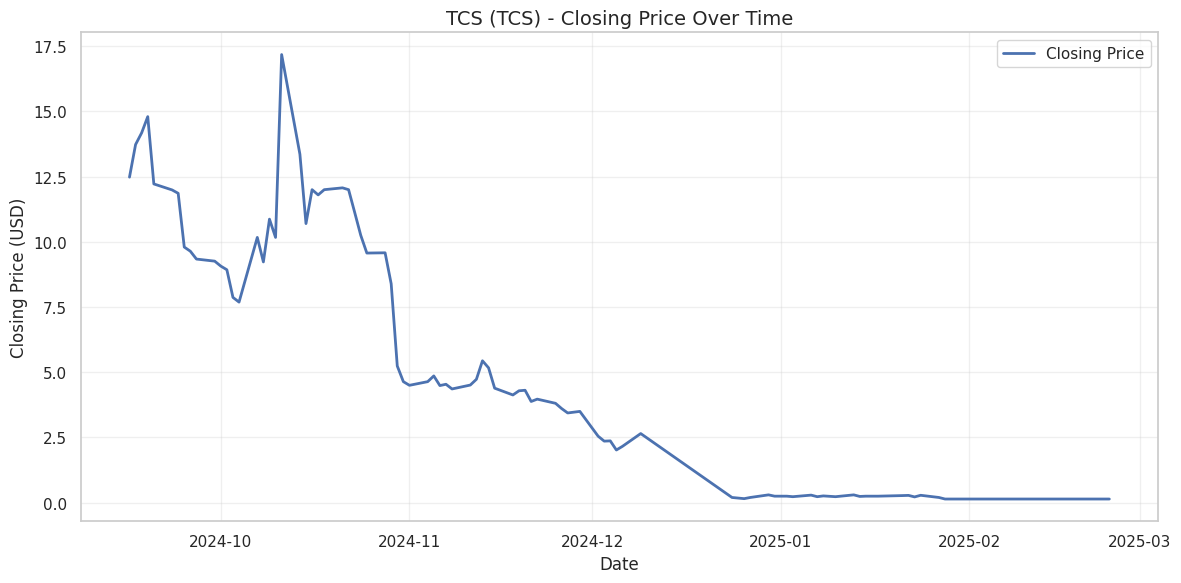

In [111]:
# Ensure data exists
if 'data' in locals() and not data.empty:
  plt.figure(figsize=(12,6))
  plt.plot(data.index, data['4. close'], label='Closing Price', linewidth=2)

  plt.title(f"{company_name} ({symbol}) - Closing Price Over Time", fontsize=14)
  plt.xlabel("Date", fontsize=12)
  plt.ylabel("Closing Price (USD)", fontsize=12)
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")

In [112]:
import plotly.graph_objects as go
# Ensure data is available
if 'data' in locals() and not data.empty:
    fig = go.Figure(data=[
        go.Candlestick(
            x=data.index,
            open=data['1. open'],
            high=data['2. high'],
            low=data['3. low'],
            close=data['4. close'],
            name=f"{company_name}"
        )
    ])

    fig.update_layout(
        title=f"{company_name} ({symbol}) - Candlestick Chart",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        xaxis_rangeslider_visible=False,
        template="plotly_white",
        width=950,
        height=550
    )

    fig.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")


# Sprint 1 Conclusion
**What we achieved in Sprint 1:**

1. Collected real-time open-source data from:


* Wikipedia (summary)
* Yahoo Finance (market prices)
* Google News RSS (recent headlines)
* Generated synthetic tweets (50) for sentiment analysis

2. Cleaned and structured data using **pandas DataFrames**
3. Performed sentiment analysis using **TextBlob**

4. Visualized key insights:
* Sentiment distribution (bar chart)
* Sentiment trend across tweets (line chart)
* Market price trend (line chart)

5. Built a flexible, interactive notebook for any asset/company input

This notebook sets the foundation for Sprint 2, where we will integrate real-time dashboards and AI-driven analytics.

In [113]:
import numpy as np
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [121]:
def card(title, content):
    html = f"""
    <div style='border:1px solid #ddd;border-radius:10px;padding:15px;margin:10px;
                background:beige;font-family:sans-serif;color:black'>
        <h3 style='text-align:center'>{title}</h3>
        <p style='line-height:1.5; font-color:white;'>{content}</p>
    </div>
    """
    display(HTML(html))


Headline,Link
Institutions own 28% of Tecsys Inc. (TSE:TCS) shares but retail investors control 53% of the company - Yahoo Finance,Read More
TCS and SINTEF Forge Partnership to Deploy Artificial Intelligence for Improving Elderly Care - Tata Consultancy Services,Read More
Charities at the 2025 TCS New York City Marathon - New York Road Runners,Read More
Morrisons taps TCS for digital operations upgrade - Consultancy.uk,Read More
Last runner to finish 2025 TCS NYC Marathon shares harrowing journey to triumph - ABC7 New York,"<a href=""https://news.google.com/rss/articles/CBMiqwFBVV95cUxPbE1LdkVlXzdSWkQzRVN3aVktY2VIdlFEUHU2cGlpM0tzUnNQYnRIRlkxZDlHdXA3by1zWHpEVDdlZkt3VGZnck9KQXhmcUs5Q210UHpibnlfWlBUV3FtTmxMbGtBbUhsenVPak1MQ3VJNlNPc2Fwc0s5elYtZmR4aXBKMDByZVZZN0FSYW1ESE12Ung5bzJnR1JkX1A3WjltY0tKaUFpMFRWaXPSAbABQVVfeXFMTl9hRElUZnZtZkhzd2N4M3Raa01nRkJxMm9tempQbmpaZjN5NjMyOWl0dVZMRmx2VFJoMko0ajdYYTB2YXhTbW9vT0o4ek54Zmh6MVZlWUdkNHB5M2lDM2RxaGw5dXJadDFEU1RwVF9uQndnYVZlblAyRHBYa2dHRzRGWDlOZU5rZ2pHSlJPQnVaamJTR0NncjdyMUpCMkVDSWp5RTdPX1FhRWF1MVBBQ1g?oc=5"" target=""_blank"">Read More"
AI to care for your grandparents? TCS partners with SINTEF for elderly revolution - Indiablooms,Read More
TCS and Sintef partner to deploy AI for elderly care - MarketScreener,Read More
Tuscaloosa City Schools prepare to support families amid SNAP benefit suspension - The Tuscaloosa News,Read More
Thematic Report on The Great IT Bifurcation: Why TCS Is Downsizing While Coforge Soars - Smartkarma,Read More
TCS Named a Leader in Digital Workplace Services by Everest Group - Tata Consultancy Services,Read More


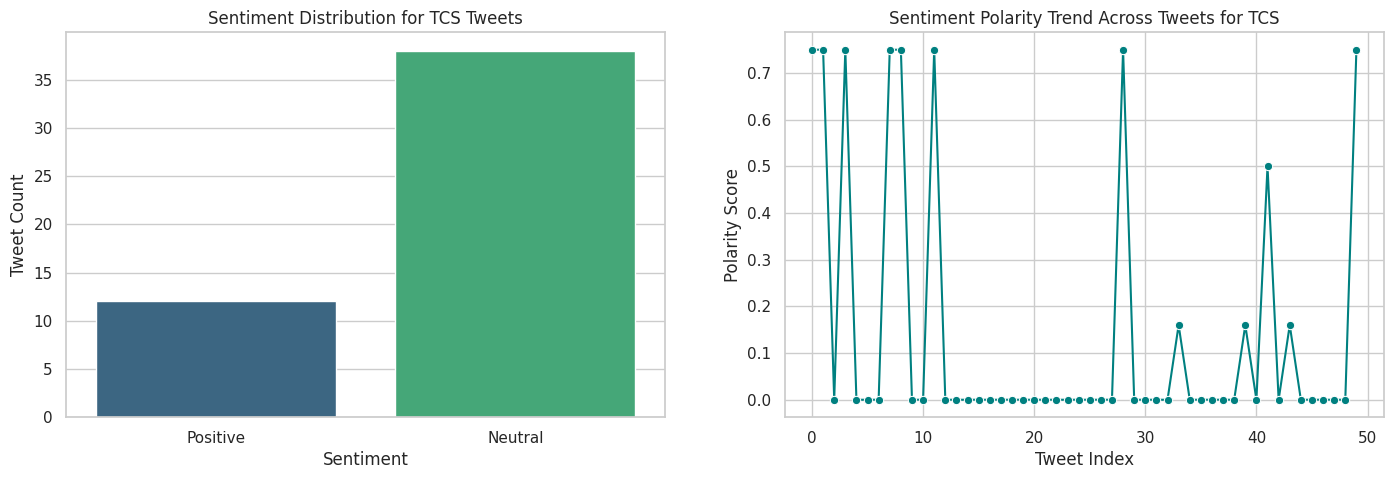

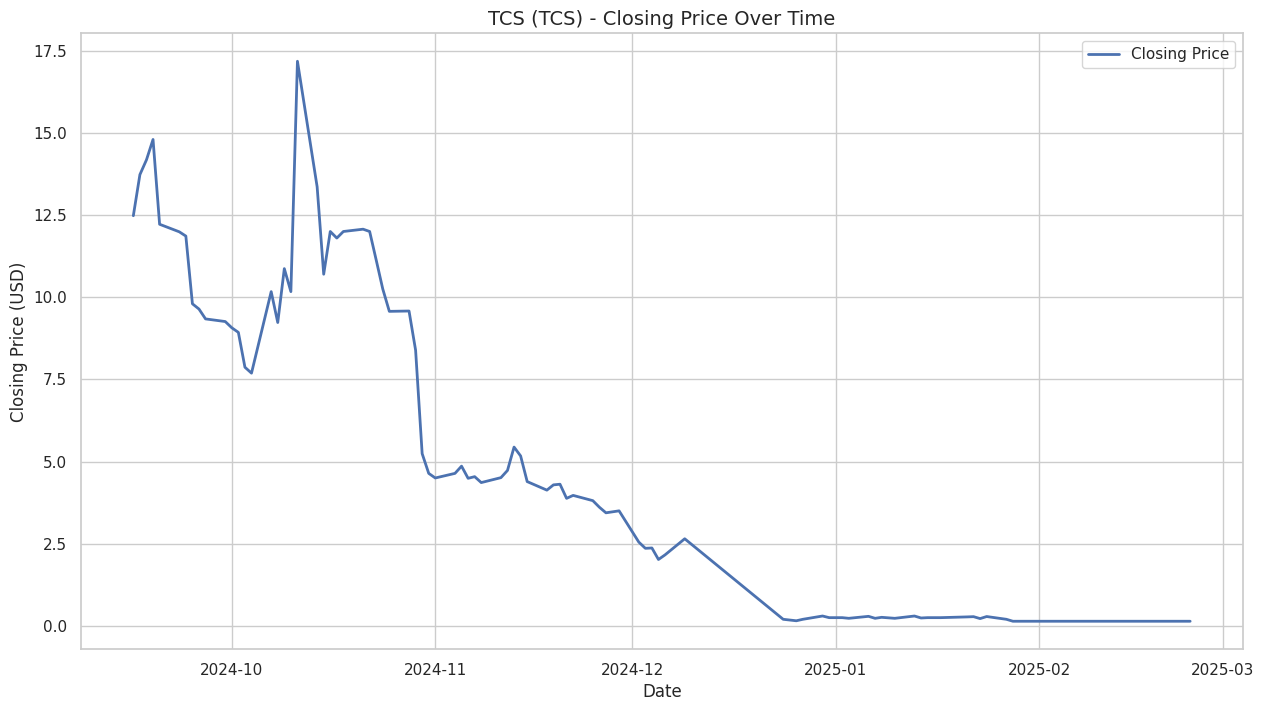

In [122]:
def dashboard(company, summary, analysis_trend, analysis_decision):
  card(company, summary)
  display(HTML(f"<h2 style='font-size:28px; margin-top:25px;'>Top 10 News Headlines for {company}:</h2>"))
  # Remove quotes around titles
  cleaned_titles = [t.strip("'\"") for t in titles]

  # Create a table
  df = pd.DataFrame({
      "Headline": cleaned_titles,
      "Link": [f'<a href="{l}" target="_blank">Read More</a>' for l in links]
  })

  display(HTML(df.to_html(escape=False, index=False)))

  fig, ax = plt.subplots(1,2, figsize=(17,5))

  sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False, ax=ax[0])
  ax[0].set_title(f"Sentiment Distribution for {company} Tweets")
  ax[0].set_xlabel("Sentiment")
  ax[0].set_ylabel("Tweet Count")

  sns.lineplot(x=tweets_df.index, y=tweets_df["Polarity"], marker='o', linestyle='-', color='teal', ax=ax[1])
  ax[1].set_title(f"Sentiment Polarity Trend Across Tweets for {company}")
  ax[1].set_xlabel("Tweet Index")
  ax[1].set_ylabel("Polarity Score")
  ax[1].grid(True)
  plt.show()

  analysis_text = f"""
  <div style='font-size:15px;'>
    📌 Asset: {company} ({symbol})<br>
    📈 Trend Status: {analysis_trend}<br>
    ✅ Decision: {analysis_decision}
    </div>
    """

  card("AI analysis Summary", analysis_text)



  fig, ax = plt.subplots(figsize=(15,8))
  sns.lineplot(x=data.index, y=data['4. close'], label='Closing Price', linewidth=2, ax=ax)
  ax.set_title(f"{company_name} ({symbol}) - Closing Price Over Time", fontsize=14)
  ax.set_xlabel("Date", fontsize=12)
  ax.set_ylabel("Closing Price (USD)", fontsize=12)

dashboard(company=asset_name, summary=company_summary, analysis_trend=trend, analysis_decision=decision)